In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

Импортируем данные для решения задачи, для отбора нужного бренда заменяем значения в столбце "Бренд" НеизвБренд.19486 на 19486, чтобы перевести данный столбец из формата object в формат int64 для последующей фильтрации данных по брендам.
Удаляем ненужные столбцы.

In [2]:
df = pd.read_excel('Итоговая таблица для формирования наборов c чистой линией.xlsx')
df.loc[(df.Бренд == "НеизвБренд.19486"), 'Бренд'] = 19486
df = df.drop(['Минимальная цена', 'Средняя цена', 'Медианная цена', 'Выручка за весь период','Берём?', 'Unnamed: 23', 'Собрать набор бренда', 'Unnamed: 26'],axis=1)
pos = len(df.columns) - 1 
df = df.drop(columns=df.columns[pos])
df['Бренд'] = pd.to_numeric(df['Бренд'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Код товара         1128 non-null   int64  
 1   Объединение        1128 non-null   object 
 2   Бренд              1128 non-null   int64  
 3   Наименование       1128 non-null   object 
 4   Норм выручка       1128 non-null   float64
 5   Максимальная цена  1128 non-null   float64
 6   Объём спроса       1128 non-null   int64  
 7   Крем               1128 non-null   int64  
 8   Маска              1128 non-null   int64  
 9   Вода               1128 non-null   int64  
 10  Гель               1128 non-null   int64  
 11  Лосьон             1128 non-null   int64  
 12  Патчи              1128 non-null   int64  
 13  Пилинг             1128 non-null   int64  
 14  Пенка              1128 non-null   int64  
 15  Средство           1128 non-null   int64  
 16  Сыворотка          1128 

Отбираем из базы данных определённый бренд

In [3]:
Brand = int(input("Введите код бренда: "))
df1=df.loc[df['Бренд'] == Brand]
df1.info()

Введите код бренда: 1027910035
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 22 to 1102
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Код товара         49 non-null     int64  
 1   Объединение        49 non-null     object 
 2   Бренд              49 non-null     int64  
 3   Наименование       49 non-null     object 
 4   Норм выручка       49 non-null     float64
 5   Максимальная цена  49 non-null     float64
 6   Объём спроса       49 non-null     int64  
 7   Крем               49 non-null     int64  
 8   Маска              49 non-null     int64  
 9   Вода               49 non-null     int64  
 10  Гель               49 non-null     int64  
 11  Лосьон             49 non-null     int64  
 12  Патчи              49 non-null     int64  
 13  Пилинг             49 non-null     int64  
 14  Пенка              49 non-null     int64  
 15  Средство           49 non-null     int64  

In [4]:
df1

,Код товара,Объединение,Бренд,Наименование,Норм выручка,Максимальная цена,Объём спроса,Крем,Маска,Вода,Гель,Лосьон,Патчи,Пилинг,Пенка,Средство,Сыворотка,Масло
22,7822321,пилинг,1027910035,Ч.Л. для лица скраб очищающий 50МЛ,0.354289,98.4,868,0,0,0,0,0,0,1,0,0,0,0
38,7837367,крем,1027910035,Ч.Л. для лица крем Д/комбКожУвл 40МЛ,0.263529,83.5,720,1,0,0,0,0,0,0,0,0,0,0
50,7841868,лосьон,1027910035,Ч.Л. для лица лосьон тоник для норм и комбинир...,0.298976,115.2,592,0,0,0,0,1,0,0,0,0,0,0
62,7838378,крем,1027910035,Ч.Л. для лица крем ДневнойУвлажняющий Д/Сух.Ко...,0.198481,84.0,553,1,0,0,0,0,0,0,0,0,0,0
65,7851511,лосьон,1027910035,Ч.Л. для лица лосьон глубокое действие против ...,0.200242,113.0,510,0,0,0,0,1,0,0,0,0,0,0
67,7822318,вода,1027910035,Ч.Л. для лица молочко для снятия макияжа для л...,0.267019,115.2,507,0,0,1,0,0,0,0,0,0,0,0
75,7841866,лосьон,1027910035,"Ч.Л. для лица лосьон тоник д/сух и чувст кожи,...",0.238635,115.2,471,0,0,0,0,1,0,0,0,0,0,0
82,7877207,вода,1027910035,Ч.Л. Фитотерапия для лица вода Мицеллярная 3в1...,0.210682,115.2,442,0,0,1,0,0,0,0,0,0,0,0
86,7822320,пилинг,1027910035,Ч.Л. для лица скраб мягкий 50МЛ,0.173957,98.4,424,0,0,0,0,0,0,1,0,0,0,0
94,7837903,крем,1027910035,Ч.Л. для лица крем Ночной Питательный Д/СухойК...,0.143182,84.0,401,1,0,0,0,0,0,0,0,0,0,0


Определяем, какие товары являются популярными, а какие - нет.

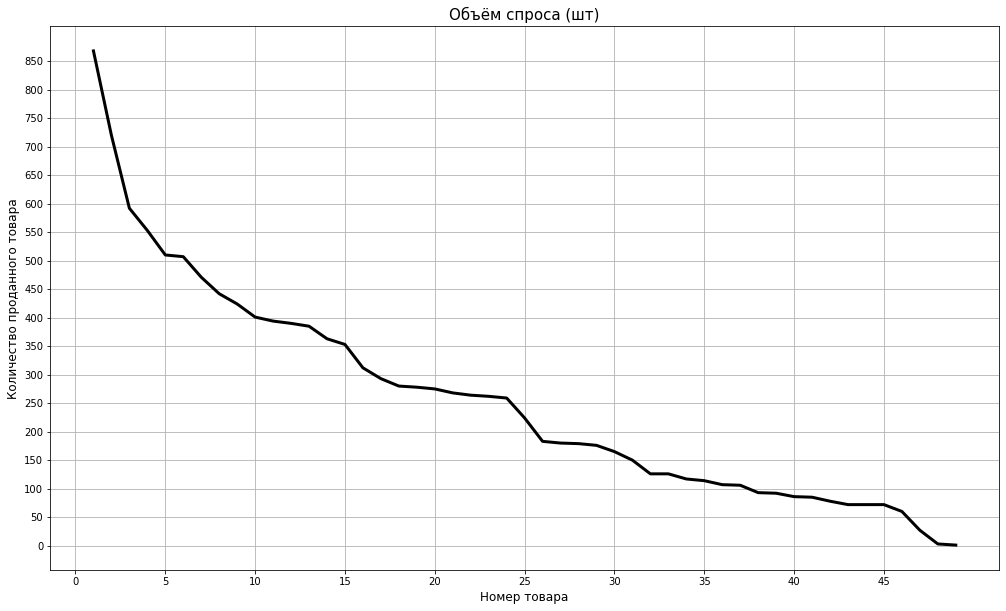

In [5]:
indx=[x+1 for x in range(len(df1.index))]
fig = plt.figure(figsize=(17, 10))
x = indx
y = df1['Объём спроса']
plt.plot(x, y, linewidth=3, color = 'black')
plt.xticks(np.arange(0,indx[-1],5))
plt.yticks(np.arange(0,df1['Объём спроса'].max(),50))
plt.title('Объём спроса (шт)', fontsize=15)
plt.xlabel('Номер товара', fontsize=12, color='black')
plt.ylabel('Количество проданного товара', fontsize=12, color='black')
plt.grid(True)
plt.show()

Товар является популярным, если продаётся больше: 500
Товар является не популярным, если продаётся меньше: 200


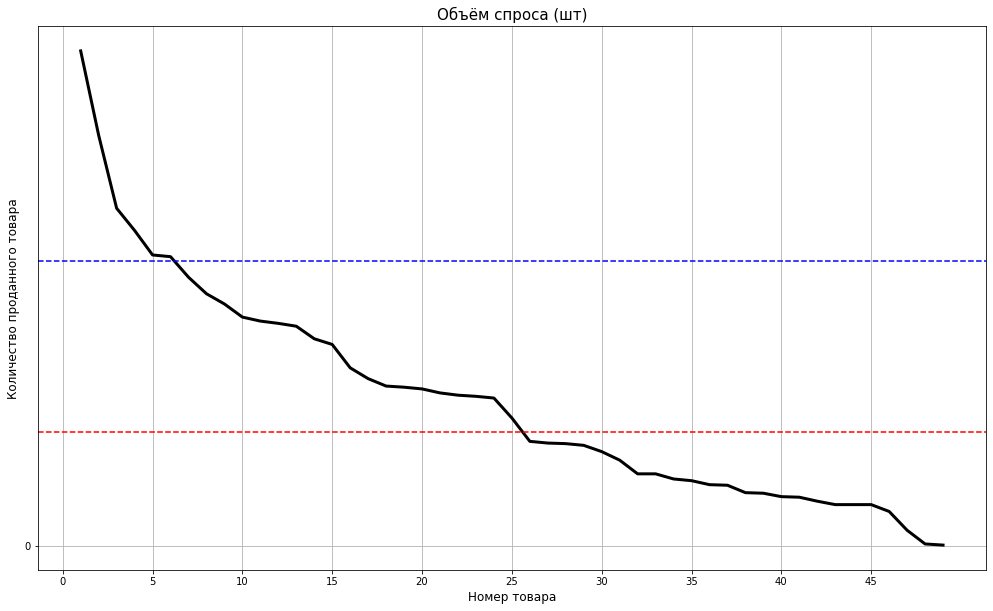

In [6]:
Population_Product = int(input("Товар является популярным, если продаётся больше: "))
Anpopulation_Product = int(input("Товар является не популярным, если продаётся меньше: "))
fig = plt.figure(figsize=(17, 10))
x = indx
y = df1['Объём спроса']
plt.plot(x, y, linewidth=3, color = 'black')
plt.xticks(np.arange(0,indx[-1],5))
plt.yticks(np.arange(0,indx[-1],50))
plt.title('Объём спроса (шт)', fontsize=15)
plt.xlabel('Номер товара', fontsize=12, color='black')
plt.ylabel('Количество проданного товара', fontsize=12, color='black')
plt.axhline(y = Population_Product, xmin = 0, xmax = indx[-1], color = 'b', linestyle = '--')
plt.axhline(y = Anpopulation_Product, xmin = 0, xmax = indx[-1], color = 'r', linestyle = '--')
plt.grid(True)
plt.show()

In [7]:
df1['Популярный'] = np.where(df1['Объём спроса'] >= Population_Product, 1, 0)
df1['Средний спрос'] = np.where((df1['Объём спроса'] <= Population_Product)&(df1['Объём спроса'] >= Anpopulation_Product), 1, 0)
df1['Непопулярный'] = np.where(df1['Объём спроса'] <= Anpopulation_Product, 1, 0)
df1['Цена товара в наборе'] = np.where(df1['Объём спроса'] >= Population_Product, df1['Максимальная цена'] * 0.95, np.where(df1['Объём спроса'] <= Anpopulation_Product, df1['Максимальная цена'] * 0.7, df1['Максимальная цена'] * 0.85))
df1

C:\Users\Vitaly\anaconda3\envs\msa\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Vitaly\anaconda3\envs\msa\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Vitaly\anaconda3\envs\msa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Код товара,Объединение,Бренд,Наименование,Норм выручка,Максимальная цена,Объём спроса,Крем,Маска,Вода,...,Патчи,Пилинг,Пенка,Средство,Сыворотка,Масло,Популярный,Средний спрос,Непопулярный,Цена товара в наборе
22,7822321,пилинг,1027910035,Ч.Л. для лица скраб очищающий 50МЛ,0.354289,98.4,868,0,0,0,...,0,1,0,0,0,0,1,0,0,93.480
38,7837367,крем,1027910035,Ч.Л. для лица крем Д/комбКожУвл 40МЛ,0.263529,83.5,720,1,0,0,...,0,0,0,0,0,0,1,0,0,79.325
50,7841868,лосьон,1027910035,Ч.Л. для лица лосьон тоник для норм и комбинир...,0.298976,115.2,592,0,0,0,...,0,0,0,0,0,0,1,0,0,109.440
62,7838378,крем,1027910035,Ч.Л. для лица крем ДневнойУвлажняющий Д/Сух.Ко...,0.198481,84.0,553,1,0,0,...,0,0,0,0,0,0,1,0,0,79.800
65,7851511,лосьон,1027910035,Ч.Л. для лица лосьон глубокое действие против ...,0.200242,113.0,510,0,0,0,...,0,0,0,0,0,0,1,0,0,107.350
67,7822318,вода,1027910035,Ч.Л. для лица молочко для снятия макияжа для л...,0.267019,115.2,507,0,0,1,...,0,0,0,0,0,0,1,0,0,109.440
75,7841866,лосьон,1027910035,"Ч.Л. для лица лосьон тоник д/сух и чувст кожи,...",0.238635,115.2,471,0,0,0,...,0,0,0,0,0,0,0,1,0,97.920
82,7877207,вода,1027910035,Ч.Л. Фитотерапия для лица вода Мицеллярная 3в1...,0.210682,115.2,442,0,0,1,...,0,0,0,0,0,0,0,1,0,97.920
86,7822320,пилинг,1027910035,Ч.Л. для лица скраб мягкий 50МЛ,0.173957,98.4,424,0,0,0,...,0,1,0,0,0,0,0,1,0,83.640
94,7837903,крем,1027910035,Ч.Л. для лица крем Ночной Питательный Д/СухойК...,0.143182,84.0,401,1,0,0,...,0,0,0,0,0,0,0,1,0,71.400


## Решаем задачу ЛП. Для начала создаём саму модель:

In [47]:
model = LpProblem(name="nabor", sense=LpMaximize)

Создаём список наименований товаров:

In [48]:
product_items = list(df1['Наименование'])

Запрашиваем количество наборов у пользователя:

In [49]:
n = int(input("Количество наборов: "))

Количество наборов: 4


Сопоставляем продукты с нормированной выручкой:

In [50]:
revenue_list = [x for x in df1['Норм выручка'] for _ in range(n)]
v=list([f'Набор №{i+1}_{j}' for j in product_items for i in range(n)])
revenue = dict(zip(v,revenue_list))

Генерируем список наименований по наборам:

In [51]:
z = [v[(i)::(n)] for i in range(n)]

Импортируйте ограничения в виде датафрейма:

In [52]:
df2 = pd.read_excel('Параметры для чистой линии.xlsx')
df2

,Unnamed: 0,Количество кремов,Количество масок,Количество воды,Количество гелей,Количество лосьонов,Количество патчей,Количество пилинга,Количество пенок,Количество средств,Количество сывороток,Количество масел,Товаров в наборе,Количество популярных,Количество средних,Количество непопулярных,Цена бокса
0,Набор 1,1,2,0,0,0,0,0,0,0,0,0,2,1,1,1,249
1,Набор 2,1,2,0,1,1,0,0,0,0,0,0,3,1,1,1,299
2,Набор 3,1,2,0,1,1,0,1,0,0,0,0,3,2,1,1,349
3,Набор 4,1,2,1,1,1,0,1,0,0,0,0,4,2,1,1,399


Сопоставляем продукты с ценой товара в наборе:

In [53]:
price_list = [x for x in df1['Цена товара в наборе'] for _ in range(n)]
price = dict(zip(v,price_list))

Сопоставляем типы товаров:

In [54]:
type_of_product_cream = dict(zip(v,[x for x in df1['Крем'] for _ in range(n)]))
type_of_product_mask = dict(zip(v,[x for x in df1['Маска'] for _ in range(n)]))
type_of_product_water = dict(zip(v,[x for x in df1['Вода'] for _ in range(n)]))
type_of_product_gel = dict(zip(v,[x for x in df1['Гель'] for _ in range(n)]))
type_of_product_lotion = dict(zip(v,[x for x in df1['Лосьон'] for _ in range(n)]))
type_of_product_patches = dict(zip(v,[x for x in df1['Патчи'] for _ in range(n)]))
type_of_product_peeling = dict(zip(v,[x for x in df1['Пилинг'] for _ in range(n)]))
type_of_product_foam = dict(zip(v,[x for x in df1['Пенка'] for _ in range(n)]))
type_of_product_remover = dict(zip(v,[x for x in df1['Средство'] for _ in range(n)]))
type_of_product_serum = dict(zip(v,[x for x in df1['Сыворотка'] for _ in range(n)]))
type_of_product_oil = dict(zip(v,[x for x in df1['Масло'] for _ in range(n)]))

Сопоставляем группы товаров по уровню спроса:

In [55]:
group_of_product_popular = dict(zip(v, [x for x in df1['Популярный'] for _ in range(n)]))
group_of_product_mediumpopular = dict(zip(v, [x for x in df1['Средний спрос'] for _ in range(n)]))
group_of_product_anpopular = dict(zip(v, [x for x in df1['Непопулярный'] for _ in range(n)]))

Создаём переменные набора:

In [56]:
nabor_vars = LpVariable.dicts("",v,lowBound=0,cat='Binary')

In [57]:
nabor_vars;

Создаём целевую функцию:

In [58]:
model += lpSum([revenue[i]*nabor_vars[i] for i in v])

Ограничения по цене:

In [59]:
for i in range(n):
    model += lpSum([price[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,16]

Ограничения по типам товаров:

In [60]:
for i in range(n):
    model += lpSum([type_of_product_cream[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,1]
    model += lpSum([type_of_product_mask[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,2]
    model += lpSum([type_of_product_water[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,3]
    model += lpSum([type_of_product_gel[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,4]
    model += lpSum([type_of_product_lotion[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,5]
    model += lpSum([type_of_product_patches[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,6]
    model += lpSum([type_of_product_peeling[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,7]
    model += lpSum([type_of_product_foam[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,8]
    model += lpSum([type_of_product_remover[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,9]
    model += lpSum([type_of_product_serum[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,10]
    model += lpSum([type_of_product_oil[f] * nabor_vars[f] for f in z[i]]) <= df2.iloc[i,11]

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               4 non-null      object
 1   Количество кремов        4 non-null      int64 
 2   Количество масок         4 non-null      int64 
 3   Количество воды          4 non-null      int64 
 4   Количество гелей         4 non-null      int64 
 5   Количество лосьонов      4 non-null      int64 
 6   Количество патчей        4 non-null      int64 
 7   Количество пилинга       4 non-null      int64 
 8   Количество пенок         4 non-null      int64 
 9   Количество средств       4 non-null      int64 
 10  Количество сывороток     4 non-null      int64 
 11  Количество масел         4 non-null      int64 
 12  Товаров в наборе         4 non-null      int64 
 13  Количество популярных    4 non-null      int64 
 14  Количество средних       4 non-null      int64

Ограничение по минимальному количеству товаров в наборах:

In [62]:
for i in range(n):
    model += lpSum([nabor_vars[f] for f in z[i]]) >= df2.iloc[i,12]

Ограничение по группам товаров в наборах:

In [63]:
for i in range(n):
    model += lpSum([group_of_product_popular[f]* nabor_vars[f] for f in z[i]]) <= df2.iloc[i,13]
    model += lpSum([group_of_product_mediumpopular[f]* nabor_vars[f] for f in z[i]]) <= df2.iloc[i,14]
    model += lpSum([group_of_product_anpopular[f]* nabor_vars[f] for f in z[i]]) <= df2.iloc[i,15]

Решаем построенную задачу:

In [64]:
%%time
model.solve()

Wall time: 938 ms


1

Выводим решение:

In [65]:
for v in model.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)

_Набор_№1_Ч.Л._NATURA_для_лица_крем_маска_ПИТАНИЕ_45МЛ__ = 1.0
_Набор_№1_Ч.Л._для_лица_крем_Д_комбКожУвл_40МЛ__ = 1.0
_Набор_№2_Ч.Л._для_лица_гель_для_умывания_глубокого_действия_идеальная_кожа_100МЛ_ = 1.0
_Набор_№2_Ч.Л._для_лица_крем_Д_комбКожУвл_40МЛ__ = 1.0
_Набор_№2_Ч.Л._для_лица_лосьон_тоник_д_сух_и_чувст_кожи,Лепестки_роз_100МЛ_ = 1.0
_Набор_№3_Ч.Л._Идеальная_кожа_для_лица_гель_Д\умыванияНежнОчищениеД\нормИкомбКж_160МЛ_ = 1.0
_Набор_№3_Ч.Л._для_лица_лосьон_тоник_для_норм_и_комбинир_кожи_Василек100МЛ_ = 1.0
_Набор_№3_Ч.Л._для_лица_скраб_очищающий_50МЛ__ = 1.0
_Набор_№4_Ч.Л._Фитотерапия_для_лица_вода_Мицеллярная_3в1_100МЛ__ = 1.0
_Набор_№4_Ч.Л._для_лица_гель_для_умывания_глубокого_действия_идеальная_кожа_100МЛ_ = 1.0
_Набор_№4_Ч.Л._для_лица_лосьон_тоник_для_норм_и_комбинир_кожи_Василек100МЛ_ = 1.0
_Набор_№4_Ч.Л._для_лица_скраб_очищающий_50МЛ__ = 1.0


In [66]:
print(f"status: {model.status}, {LpStatus[model.status]}")

print(f"objective: {model.objective.value()}")

status: 1, Optimal
objective: 2.7511770767241615


## РАСШИРЕННАЯ МАТ МОДЕЛЬ ЗАДАЧИ

1) Ограничение по вхождению товара в наборы

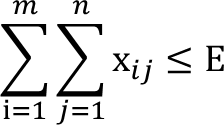

In [67]:
e1 = list([f'Набор №{i+1}_{j}' for j in product_items for i in range(n)])
e = [e1[x:x+n] for x in range(0, len(e1), n)]
E = int(input("Товар может встречаться в количестве не более : "))
for i in range(len(e)):
    model += lpSum([nabor_vars[f] for f in e[i]]) <= E

Товар может встречаться в количестве не более : 3


Ограничения, для которых потребуются дополнительные данные:

2) Ограничение по коллекциям (или иным объединяющим параметрам)
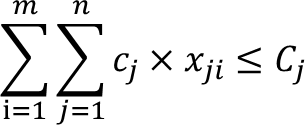

Разделим на 3 коллекции товары бренда "Чистая Линия":

In [68]:
df1["Общая коллекция"] = [1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]
df1["Коллекция Идеальная кожа"] = [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0]
df1["Коллекция Natura"] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0]
df1["Коллекция Фитотерапия"]= [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
df1

C:\Users\Vitaly\anaconda3\envs\msa\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Vitaly\anaconda3\envs\msa\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Vitaly\anaconda3\envs\msa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Код товара,Объединение,Бренд,Наименование,Норм выручка,Максимальная цена,Объём спроса,Крем,Маска,Вода,...,Популярный,Средний спрос,Непопулярный,Цена товара в наборе,Общая коллекция,Коллекция Идеальная кожа,Коллекция Natura,Коллекция Фитотерапия,Количество дней на складе,Количество товара на складе
22,7822321,пилинг,1027910035,Ч.Л. для лица скраб очищающий 50МЛ,0.354289,98.4,868,0,0,0,...,1,0,0,93.480,1,0,0,0,174,9591
38,7837367,крем,1027910035,Ч.Л. для лица крем Д/комбКожУвл 40МЛ,0.263529,83.5,720,1,0,0,...,1,0,0,79.325,1,0,0,0,225,223
50,7841868,лосьон,1027910035,Ч.Л. для лица лосьон тоник для норм и комбинир...,0.298976,115.2,592,0,0,0,...,1,0,0,109.440,1,0,0,0,34,7156
62,7838378,крем,1027910035,Ч.Л. для лица крем ДневнойУвлажняющий Д/Сух.Ко...,0.198481,84.0,553,1,0,0,...,1,0,0,79.800,1,0,0,0,154,4973
65,7851511,лосьон,1027910035,Ч.Л. для лица лосьон глубокое действие против ...,0.200242,113.0,510,0,0,0,...,1,0,0,107.350,1,0,0,0,269,7895
67,7822318,вода,1027910035,Ч.Л. для лица молочко для снятия макияжа для л...,0.267019,115.2,507,0,0,1,...,1,0,0,109.440,1,0,0,0,158,9402
75,7841866,лосьон,1027910035,"Ч.Л. для лица лосьон тоник д/сух и чувст кожи,...",0.238635,115.2,471,0,0,0,...,0,1,0,97.920,1,0,0,0,266,3566
82,7877207,вода,1027910035,Ч.Л. Фитотерапия для лица вода Мицеллярная 3в1...,0.210682,115.2,442,0,0,1,...,0,1,0,97.920,0,0,0,1,174,7428
86,7822320,пилинг,1027910035,Ч.Л. для лица скраб мягкий 50МЛ,0.173957,98.4,424,0,0,0,...,0,1,0,83.640,1,0,0,0,330,5994
94,7837903,крем,1027910035,Ч.Л. для лица крем Ночной Питательный Д/СухойК...,0.143182,84.0,401,1,0,0,...,0,1,0,71.400,1,0,0,0,282,1891


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 22 to 1102
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Код товара                   49 non-null     int64  
 1   Объединение                  49 non-null     object 
 2   Бренд                        49 non-null     int64  
 3   Наименование                 49 non-null     object 
 4   Норм выручка                 49 non-null     float64
 5   Максимальная цена            49 non-null     float64
 6   Объём спроса                 49 non-null     int64  
 7   Крем                         49 non-null     int64  
 8   Маска                        49 non-null     int64  
 9   Вода                         49 non-null     int64  
 10  Гель                         49 non-null     int64  
 11  Лосьон                       49 non-null     int64  
 12  Патчи                        49 non-null     int64  
 13  Пилинг             

Сопоставляем группы товаров по коллекциям и наименованиям:

In [70]:
collection_of_general = dict(zip(e1, [x for x in df1['Общая коллекция'] for _ in range(n)]))
collection_of_ideal_skin = dict(zip(e1, [x for x in df1['Коллекция Идеальная кожа'] for _ in range(n)]))
collection_of_natura = dict(zip(e1, [x for x in df1['Коллекция Natura'] for _ in range(n)]))
collection_of_fito = dict(zip(e1, [x for x in df1['Коллекция Фитотерапия'] for _ in range(n)]))

Создаём ограничения:

In [71]:
c1 = [5,5,5,5]
c2 = [0,0,0,0]
c3 = [1,0,0,0]
c4 = [5,5,5,5]
for i in range(n):
    model += lpSum([collection_of_general[f]* nabor_vars[f] for f in z[i]]) <= c1[i]
    model += lpSum([collection_of_ideal_skin[f]* nabor_vars[f] for f in z[i]]) <= c2[i]
    model += lpSum([collection_of_natura[f]* nabor_vars[f] for f in z[i]]) <= c3[i]
    model += lpSum([collection_of_fito[f]* nabor_vars[f] for f in z[i]]) <= c4[i]

3) Ограничение по количеству дней на складе:
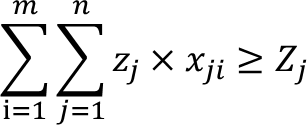

Создаём столбец с количесвтвом дней на складе (или запасе), так как данные не были предоставлены, то пусть данные генерируются случайно.

In [72]:
df1["Количество дней на складе"] = np.random.randint(10, 365, df1.shape[0])
df1

C:\Users\Vitaly\anaconda3\envs\msa\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Код товара,Объединение,Бренд,Наименование,Норм выручка,Максимальная цена,Объём спроса,Крем,Маска,Вода,...,Популярный,Средний спрос,Непопулярный,Цена товара в наборе,Общая коллекция,Коллекция Идеальная кожа,Коллекция Natura,Коллекция Фитотерапия,Количество дней на складе,Количество товара на складе
22,7822321,пилинг,1027910035,Ч.Л. для лица скраб очищающий 50МЛ,0.354289,98.4,868,0,0,0,...,1,0,0,93.480,1,0,0,0,325,9591
38,7837367,крем,1027910035,Ч.Л. для лица крем Д/комбКожУвл 40МЛ,0.263529,83.5,720,1,0,0,...,1,0,0,79.325,1,0,0,0,83,223
50,7841868,лосьон,1027910035,Ч.Л. для лица лосьон тоник для норм и комбинир...,0.298976,115.2,592,0,0,0,...,1,0,0,109.440,1,0,0,0,332,7156
62,7838378,крем,1027910035,Ч.Л. для лица крем ДневнойУвлажняющий Д/Сух.Ко...,0.198481,84.0,553,1,0,0,...,1,0,0,79.800,1,0,0,0,352,4973
65,7851511,лосьон,1027910035,Ч.Л. для лица лосьон глубокое действие против ...,0.200242,113.0,510,0,0,0,...,1,0,0,107.350,1,0,0,0,348,7895
67,7822318,вода,1027910035,Ч.Л. для лица молочко для снятия макияжа для л...,0.267019,115.2,507,0,0,1,...,1,0,0,109.440,1,0,0,0,181,9402
75,7841866,лосьон,1027910035,"Ч.Л. для лица лосьон тоник д/сух и чувст кожи,...",0.238635,115.2,471,0,0,0,...,0,1,0,97.920,1,0,0,0,28,3566
82,7877207,вода,1027910035,Ч.Л. Фитотерапия для лица вода Мицеллярная 3в1...,0.210682,115.2,442,0,0,1,...,0,1,0,97.920,0,0,0,1,356,7428
86,7822320,пилинг,1027910035,Ч.Л. для лица скраб мягкий 50МЛ,0.173957,98.4,424,0,0,0,...,0,1,0,83.640,1,0,0,0,241,5994
94,7837903,крем,1027910035,Ч.Л. для лица крем Ночной Питательный Д/СухойК...,0.143182,84.0,401,1,0,0,...,0,1,0,71.400,1,0,0,0,100,1891


Создаём ограничения:

In [73]:
count_of_day_list = [x for x in df1['Количество дней на складе'] for _ in range(n)]
count_of_day = dict(zip(e1,count_of_day_list))

In [74]:
day = int(input("Товар должен находиться в запасе более : "))
for i in range(n):
    model += lpSum([count_of_day[f] * nabor_vars[f] for f in z[i]]) >= day

Товар должен находиться в запасе более : 5


4) Ограничение по количеству товара на складе (в запасе) (проверка наличия товара)
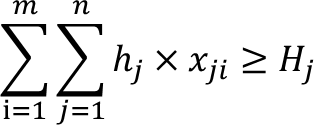

In [75]:
df1["Количество товара на складе"] = np.random.randint(100, 10000, df1.shape[0])
df1

C:\Users\Vitaly\anaconda3\envs\msa\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Код товара,Объединение,Бренд,Наименование,Норм выручка,Максимальная цена,Объём спроса,Крем,Маска,Вода,...,Популярный,Средний спрос,Непопулярный,Цена товара в наборе,Общая коллекция,Коллекция Идеальная кожа,Коллекция Natura,Коллекция Фитотерапия,Количество дней на складе,Количество товара на складе
22,7822321,пилинг,1027910035,Ч.Л. для лица скраб очищающий 50МЛ,0.354289,98.4,868,0,0,0,...,1,0,0,93.480,1,0,0,0,325,1343
38,7837367,крем,1027910035,Ч.Л. для лица крем Д/комбКожУвл 40МЛ,0.263529,83.5,720,1,0,0,...,1,0,0,79.325,1,0,0,0,83,8976
50,7841868,лосьон,1027910035,Ч.Л. для лица лосьон тоник для норм и комбинир...,0.298976,115.2,592,0,0,0,...,1,0,0,109.440,1,0,0,0,332,9835
62,7838378,крем,1027910035,Ч.Л. для лица крем ДневнойУвлажняющий Д/Сух.Ко...,0.198481,84.0,553,1,0,0,...,1,0,0,79.800,1,0,0,0,352,9983
65,7851511,лосьон,1027910035,Ч.Л. для лица лосьон глубокое действие против ...,0.200242,113.0,510,0,0,0,...,1,0,0,107.350,1,0,0,0,348,869
67,7822318,вода,1027910035,Ч.Л. для лица молочко для снятия макияжа для л...,0.267019,115.2,507,0,0,1,...,1,0,0,109.440,1,0,0,0,181,1831
75,7841866,лосьон,1027910035,"Ч.Л. для лица лосьон тоник д/сух и чувст кожи,...",0.238635,115.2,471,0,0,0,...,0,1,0,97.920,1,0,0,0,28,2367
82,7877207,вода,1027910035,Ч.Л. Фитотерапия для лица вода Мицеллярная 3в1...,0.210682,115.2,442,0,0,1,...,0,1,0,97.920,0,0,0,1,356,4146
86,7822320,пилинг,1027910035,Ч.Л. для лица скраб мягкий 50МЛ,0.173957,98.4,424,0,0,0,...,0,1,0,83.640,1,0,0,0,241,7531
94,7837903,крем,1027910035,Ч.Л. для лица крем Ночной Питательный Д/СухойК...,0.143182,84.0,401,1,0,0,...,0,1,0,71.400,1,0,0,0,100,8175


In [77]:
count_of_product_list = [x for x in df1['Количество товара на складе'] for _ in range(n)]
count_of_product = dict(zip(e1,count_of_product_list))
count = int(input("Товар должно быть более : "))
for i in range(n):
    model += lpSum([count_of_product[f] * nabor_vars[f] for f in z[i]]) >= count

Товар должно быть более : 1


Решаем расширенную задачу:

In [78]:
model.solve()

1

In [79]:
print(f"status: {model.status}, {LpStatus[model.status]}")

print(f"objective: {model.objective.value()}")

for v in model.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)

status: 1, Optimal
objective: 2.7469648091663483
_Набор_№1_Ч.Л._NATURA_для_лица_крем_маска_ПИТАНИЕ_45МЛ__ = 1.0
_Набор_№1_Ч.Л._для_лица_крем_Д_комбКожУвл_40МЛ__ = 1.0
_Набор_№2_Ч.Л._для_лица_гель_для_умывания_глубокого_действия_идеальная_кожа_100МЛ_ = 1.0
_Набор_№2_Ч.Л._для_лица_крем_Д_комбКожУвл_40МЛ__ = 1.0
_Набор_№2_Ч.Л._для_лица_лосьон_тоник_д_сух_и_чувст_кожи,Лепестки_роз_100МЛ_ = 1.0
_Набор_№3_Ч.Л._для_лица_гель_Д_всехТиповКожи_40МЛ__ = 1.0
_Набор_№3_Ч.Л._для_лица_крем_Д_комбКожУвл_40МЛ__ = 1.0
_Набор_№3_Ч.Л._для_лица_лосьон_тоник_д_сух_и_чувст_кожи,Лепестки_роз_100МЛ_ = 1.0
_Набор_№3_Ч.Л._для_лица_скраб_очищающий_50МЛ__ = 1.0
_Набор_№4_Ч.Л._Фитотерапия_для_лица_вода_Мицеллярная_3в1_100МЛ__ = 1.0
_Набор_№4_Ч.Л._для_лица_гель_для_умывания_глубокого_действия_идеальная_кожа_100МЛ_ = 1.0
_Набор_№4_Ч.Л._для_лица_лосьон_тоник_для_норм_и_комбинир_кожи_Василек100МЛ_ = 1.0
_Набор_№4_Ч.Л._для_лица_скраб_очищающий_50МЛ__ = 1.0
